In [10]:
import pandas as pd
import numpy as np

input_file = './phase1_training/process_data_task2.csv' #增强样本
#input_file = './phase1_training/process_data_task2_base.csv' 
#input_file = 'rolling_data1.csv'
data = pd.read_csv(input_file)
print(data.groupby(['tollgate_id','direction'])['y'].count())
print(data.groupby(['timewindow_id'])['y'].mean())

tollgate_id  direction
1            0            1584
             1            1584
2            0            1584
3            0            1584
             1            1584
Name: y, dtype: int64
timewindow_id
0     104.781818
1     108.890909
2     110.827273
3     108.081818
4     102.763636
5      93.336364
6      88.872727
7      88.927273
8      84.554545
9      65.690909
10     64.690909
11     57.354545
Name: y, dtype: float64


In [2]:
data=data[data[start_time]]

,tollgate_id,start_time,direction,y,tollgate_direction_10,tollgate_direction_11,tollgate_direction_20,tollgate_direction_30,tollgate_direction_31,vehicle_model_0-last_1,...,pressure,wind_speed,temperature,rel_humidity,precipitation,wind_direction2,wind_speed2,precipitation2,SSD,SSD_level
0,1,2016-09-19 08:00:00,0,46.0,1,0,0,0,0,0.0,...,1007.4,6.2,26.8,56.0,0.0,8.0,4.0,0.0,64.441467,0.0
1,1,2016-09-19 08:20:00,0,56.0,1,0,0,0,0,0.0,...,1007.4,6.2,26.8,56.0,0.0,8.0,4.0,0.0,64.441467,0.0
2,1,2016-09-19 08:40:00,0,41.0,1,0,0,0,0,0.0,...,1007.4,6.2,26.8,56.0,0.0,8.0,4.0,0.0,64.441467,0.0
3,1,2016-09-19 09:00:00,0,50.0,1,0,0,0,0,9.0,...,1008.3,5.3,23.8,72.0,0.1,8.0,3.0,1.0,63.776369,0.0
4,1,2016-09-19 09:20:00,0,49.0,1,0,0,0,0,0.0,...,1008.3,5.3,23.8,72.0,0.1,8.0,3.0,1.0,63.776369,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7915,3,2016-10-17 17:20:00,1,82.0,0,0,0,0,1,0.0,...,1014.7,0.9,18.9,92.0,0.0,5.0,1.0,0.0,70.720857,0.0
7916,3,2016-10-17 17:40:00,1,84.0,0,0,0,0,1,0.0,...,1014.7,0.9,18.9,92.0,0.0,5.0,1.0,0.0,70.720857,0.0
7917,3,2016-10-17 18:00:00,1,79.0,0,0,0,0,1,0.0,...,1014.0,1.5,19.1,92.0,0.0,8.0,1.0,0.0,69.191574,0.0
7918,3,2016-10-17 18:20:00,1,86.0,0,0,0,0,1,0.0,...,1014.0,1.5,19.1,92.0,0.0,8.0,1.0,0.0,69.191574,0.0


In [3]:
def split_by_data(data):
    last_day_train = '2016-09-31'
    first_day_test = '2016-10-11' #除去国庆七天
    data['hour']=pd.to_datetime(data['start_time']).dt.hour
    test_data=data[data['date']>=pd.to_datetime(first_day_test)]
    train_data=data[data['date']<=pd.to_datetime(first_day_test)]
    test_data=test_data.drop(['date'],axis=1).reset_index(drop=True)
    train_data=train_data.drop(['date'],axis=1).reset_index(drop=True)
    return data_morn,data_noon


def split_by_data(data):
    last_day_train = '2016-09-31'
    first_day_test = '2016-10-11' #除去国庆七天
    data['date']=pd.to_datetime(data['start_time']).dt.date
    test_data=data[data['date']>=pd.to_datetime(first_day_test)]
    train_data=data[data['date']<=pd.to_datetime(first_day_test)]
    test_data=test_data.drop(['date'],axis=1).reset_index(drop=True)
    train_data=train_data.drop(['date'],axis=1).reset_index(drop=True)
    return train_data,test_data

def get_x_y(data):
    #data = np.array(data)
    X = np.array(data)[:,4:]
    Y = np.array(data)[:,3]
    return X,Y

def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true))

In [4]:
train_data,test_data = split_by_data(data)
x_train,y_train = get_x_y(train_data)
x_test,y_test = get_x_y(test_data)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(5760, 138) (5760,)
(2520, 138) (2520,)


In [5]:
list(test_data.columns)

['tollgate_id',
 'start_time',
 'direction',
 'y',
 'tollgate_direction_10',
 'tollgate_direction_11',
 'tollgate_direction_20',
 'tollgate_direction_30',
 'tollgate_direction_31',
 'vehicle_model_0-last_1',
 'vehicle_model_1-last_1',
 'vehicle_model_2-last_1',
 'vehicle_model_3-last_1',
 'vehicle_model_4-last_1',
 'vehicle_model_5-last_1',
 'vehicle_model_6-last_1',
 'vehicle_model_7-last_1',
 'has_etc_0-last_1',
 'has_etc_1-last_1',
 'y-last_1',
 'vehicle_model_0-last_2',
 'vehicle_model_1-last_2',
 'vehicle_model_2-last_2',
 'vehicle_model_3-last_2',
 'vehicle_model_4-last_2',
 'vehicle_model_5-last_2',
 'vehicle_model_6-last_2',
 'vehicle_model_7-last_2',
 'has_etc_0-last_2',
 'has_etc_1-last_2',
 'y-last_2',
 'vehicle_model_0-last_3',
 'vehicle_model_1-last_3',
 'vehicle_model_2-last_3',
 'vehicle_model_3-last_3',
 'vehicle_model_4-last_3',
 'vehicle_model_5-last_3',
 'vehicle_model_6-last_3',
 'vehicle_model_7-last_3',
 'has_etc_0-last_3',
 'has_etc_1-last_3',
 'y-last_3',
 'vehi

In [6]:
print(test_data.apply(lambda x: abs(x['y_global20mins_mean'] - x['y'])/ x['y'], axis=1).mean())
test_data[['y_global20mins_mean','y']]

0.3937715476329899


,y_global20mins_mean,y
0,104.781818,49.0
1,108.890909,49.0
2,110.827273,40.0
3,108.081818,45.0
4,102.763636,47.0
...,...,...
2515,88.927273,82.0
2516,84.554545,84.0
2517,65.690909,79.0
2518,64.690909,86.0


In [7]:
import xgboost as xgb 
model = xgb.XGBRegressor(max_depth=5, learning_rate=0.1, n_estimators=160, silent=False, objective='reg:gamma')
model.fit(x_train,y_train)
ans = model.predict(x_test)
mape(y_test,ans)

0.1390912248777923

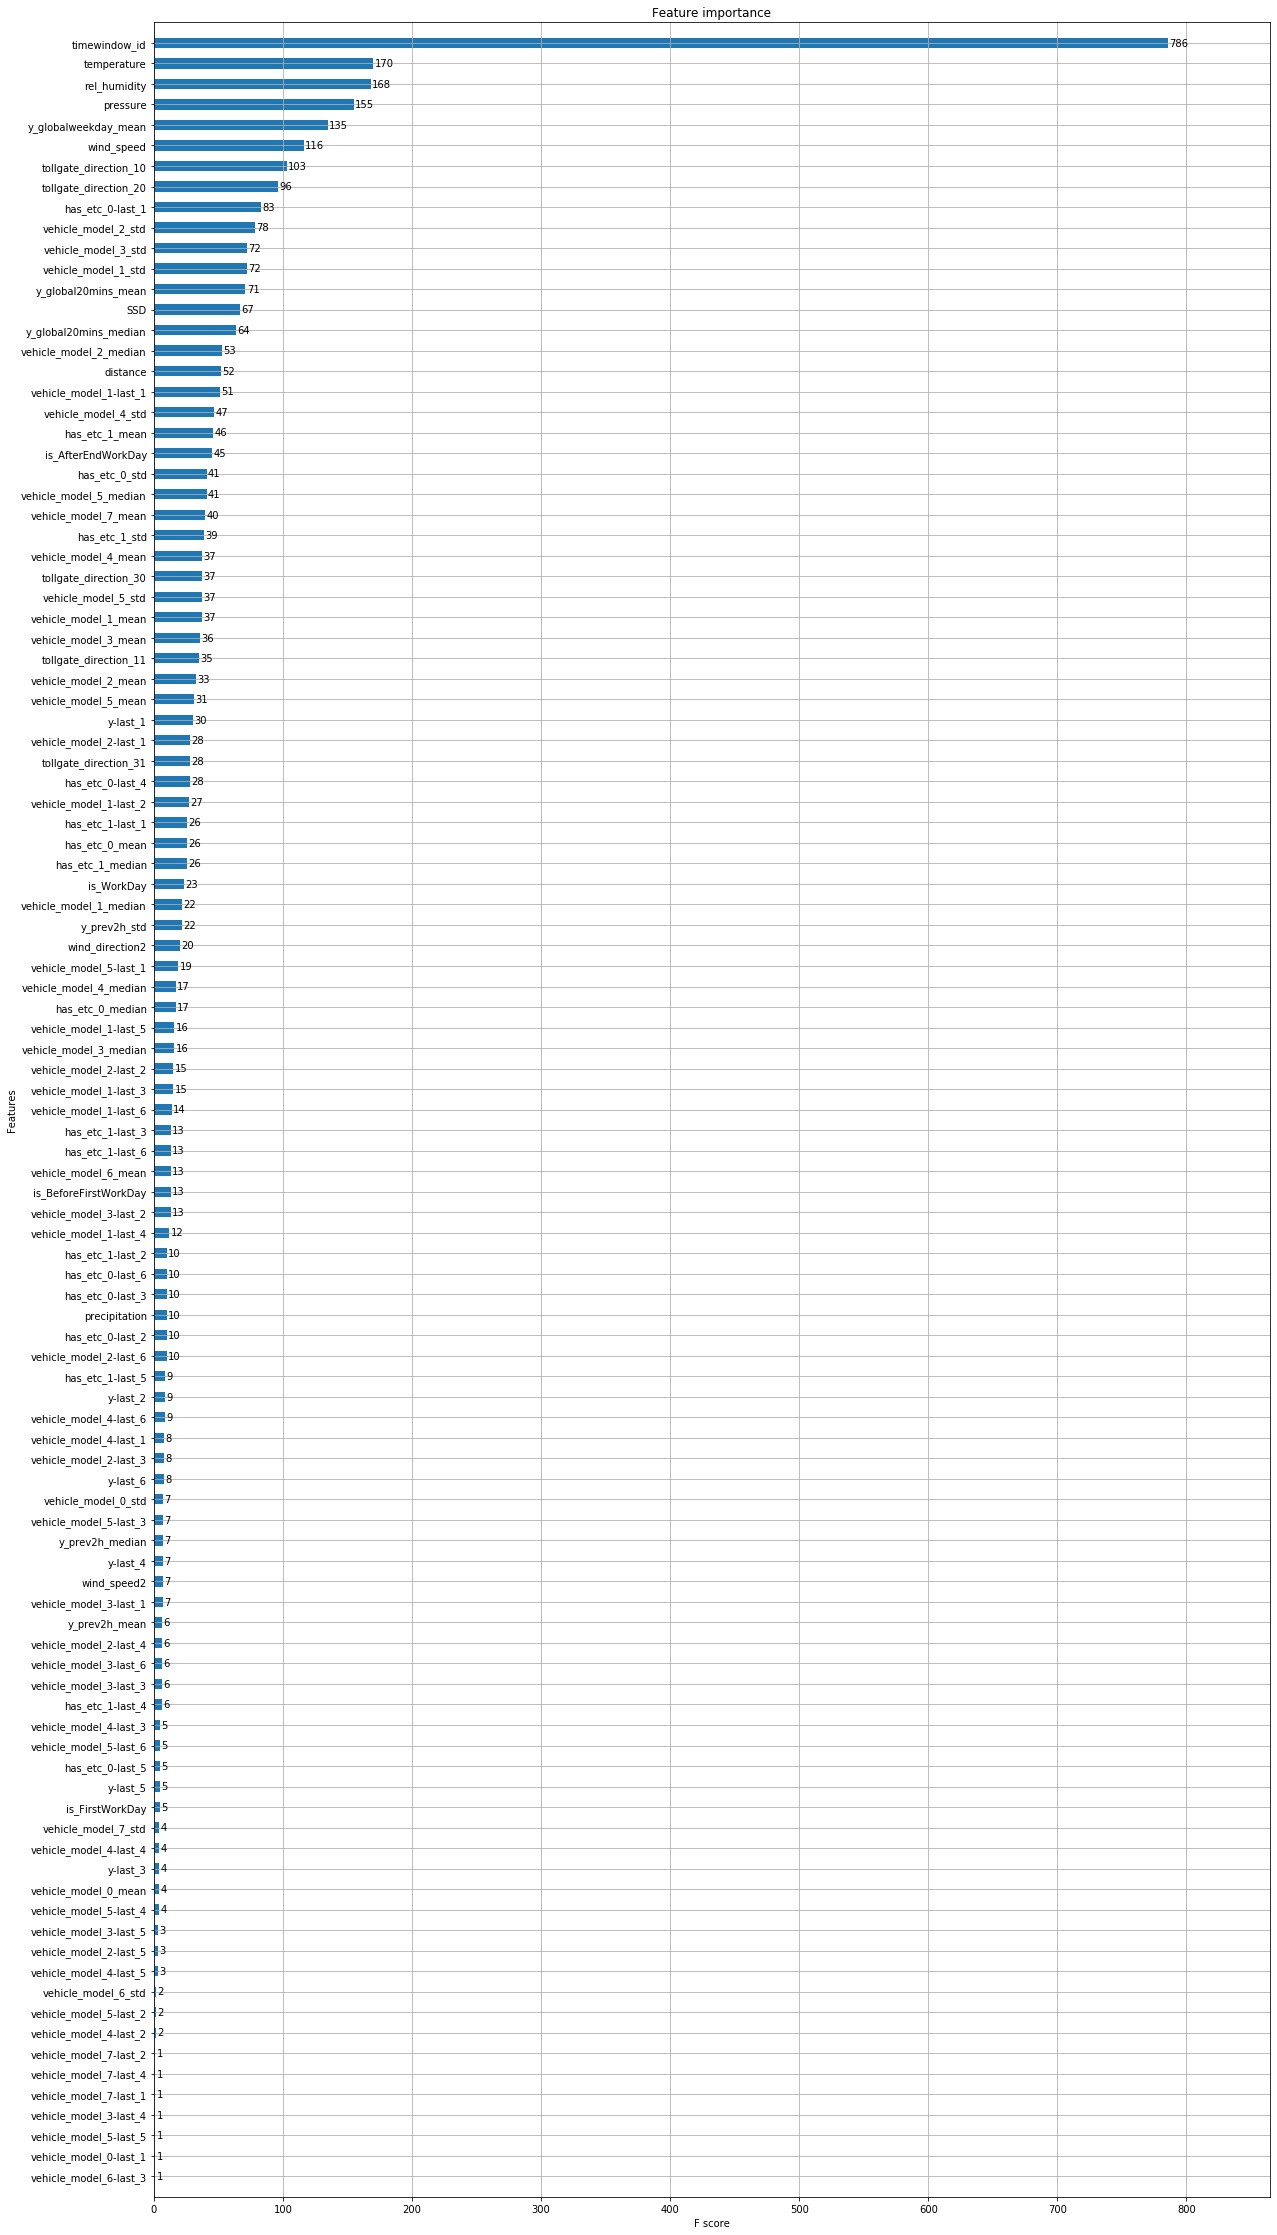

In [9]:
from xgboost import plot_importance
from matplotlib import pyplot

model.get_booster().feature_names = list(data.columns)[4:]
model.get_booster().get_fscore()

fig,ax = pyplot.subplots(figsize=(20,40))
plot_importance(model,height=0.5,ax=ax)
pyplot.show()

In [11]:
#xgb2
def mape_ln(y,d):
    c=d.get_label()
    result= -np.sum(np.abs(np.expm1(y)-np.abs(np.expm1(c)))/np.abs(np.expm1(c)))/len(c)
    return "mape",result

def xgb_mape(preds, dtrain):
   labels = dtrain.get_label()
   return('mape', np.mean(np.abs((labels - preds) / (labels+1))))

def mape_object(d,y):
    # print(d)
    # print(y)
    grad=1.0*(y-d)/d
    hess=1.0/d
    return grad,hess

xlf = xgb.XGBRegressor(#max_depth=8,
                       learning_rate=0.01,
                       n_estimators=1000, #迭代次数
                       silent=True,
                       objective=mape_object,
                       #objective='reg:linear',
                       nthread=-1,
                       gamma=0,
                       min_child_weight=6,
                       max_delta_step=0,
                       subsample=0.9,
                       colsample_bytree=0.8,
                       colsample_bylevel=1,
                       reg_alpha=1e0,
                       reg_lambda=0,
                       scale_pos_weight=1,
                       seed=9,
                       missing=None)

xlf.fit(x_train,y_train, eval_metric=xgb_mape, 
        verbose=True, eval_set=[(x_train,y_train)])#,early_stopping_rounds=20)
ans = xlf.predict(x_test)
mape(y_test,ans)

[0]	validation_0-rmse:96.3794	validation_0-mape:0.968375
[1]	validation_0-rmse:95.5814	validation_0-mape:0.958907
[2]	validation_0-rmse:94.7897	validation_0-mape:0.949736
[3]	validation_0-rmse:94.0108	validation_0-mape:0.940525
[4]	validation_0-rmse:93.2451	validation_0-mape:0.931417
[5]	validation_0-rmse:92.4834	validation_0-mape:0.922552
[6]	validation_0-rmse:91.7253	validation_0-mape:0.913763
[7]	validation_0-rmse:90.975	validation_0-mape:0.905055
[8]	validation_0-rmse:90.237	validation_0-mape:0.896429
[9]	validation_0-rmse:89.511	validation_0-mape:0.887935
[10]	validation_0-rmse:88.7965	validation_0-mape:0.879352
[11]	validation_0-rmse:88.0799	validation_0-mape:0.870979
[12]	validation_0-rmse:87.3518	validation_0-mape:0.862633
[13]	validation_0-rmse:86.6522	validation_0-mape:0.854314
[14]	validation_0-rmse:85.9553	validation_0-mape:0.846291
[15]	validation_0-rmse:85.2702	validation_0-mape:0.838187
[16]	validation_0-rmse:84.5923	validation_0-mape:0.830345
[17]	validation_0-rmse:83.9

[142]	validation_0-rmse:35.4091	validation_0-mape:0.297238
[143]	validation_0-rmse:35.2326	validation_0-mape:0.295568
[144]	validation_0-rmse:35.0563	validation_0-mape:0.293854
[145]	validation_0-rmse:34.8656	validation_0-mape:0.292056
[146]	validation_0-rmse:34.6824	validation_0-mape:0.290246
[147]	validation_0-rmse:34.4991	validation_0-mape:0.288523
[148]	validation_0-rmse:34.3343	validation_0-mape:0.286867
[149]	validation_0-rmse:34.1532	validation_0-mape:0.285126
[150]	validation_0-rmse:33.9753	validation_0-mape:0.283419
[151]	validation_0-rmse:33.8017	validation_0-mape:0.281881
[152]	validation_0-rmse:33.628	validation_0-mape:0.280227
[153]	validation_0-rmse:33.4593	validation_0-mape:0.278574
[154]	validation_0-rmse:33.2979	validation_0-mape:0.277052
[155]	validation_0-rmse:33.142	validation_0-mape:0.275575
[156]	validation_0-rmse:32.9782	validation_0-mape:0.274003
[157]	validation_0-rmse:32.8184	validation_0-mape:0.272472
[158]	validation_0-rmse:32.6586	validation_0-mape:0.270942

[282]	validation_0-rmse:22.4386	validation_0-mape:0.188155
[283]	validation_0-rmse:22.4015	validation_0-mape:0.187876
[284]	validation_0-rmse:22.3629	validation_0-mape:0.187608
[285]	validation_0-rmse:22.3271	validation_0-mape:0.187323
[286]	validation_0-rmse:22.2934	validation_0-mape:0.187129
[287]	validation_0-rmse:22.2544	validation_0-mape:0.186855
[288]	validation_0-rmse:22.2165	validation_0-mape:0.186606
[289]	validation_0-rmse:22.1774	validation_0-mape:0.1864
[290]	validation_0-rmse:22.1458	validation_0-mape:0.186153
[291]	validation_0-rmse:22.1084	validation_0-mape:0.185905
[292]	validation_0-rmse:22.0721	validation_0-mape:0.185683
[293]	validation_0-rmse:22.0432	validation_0-mape:0.185545
[294]	validation_0-rmse:22.0104	validation_0-mape:0.185323
[295]	validation_0-rmse:21.9778	validation_0-mape:0.185082
[296]	validation_0-rmse:21.9467	validation_0-mape:0.18488
[297]	validation_0-rmse:21.9147	validation_0-mape:0.184687
[298]	validation_0-rmse:21.889	validation_0-mape:0.184573
[

[422]	validation_0-rmse:19.6558	validation_0-mape:0.172253
[423]	validation_0-rmse:19.6449	validation_0-mape:0.172191
[424]	validation_0-rmse:19.6336	validation_0-mape:0.172103
[425]	validation_0-rmse:19.623	validation_0-mape:0.172042
[426]	validation_0-rmse:19.61	validation_0-mape:0.171942
[427]	validation_0-rmse:19.6	validation_0-mape:0.171909
[428]	validation_0-rmse:19.5902	validation_0-mape:0.171875
[429]	validation_0-rmse:19.5797	validation_0-mape:0.171819
[430]	validation_0-rmse:19.5672	validation_0-mape:0.17174
[431]	validation_0-rmse:19.5602	validation_0-mape:0.171727
[432]	validation_0-rmse:19.5523	validation_0-mape:0.171688
[433]	validation_0-rmse:19.5445	validation_0-mape:0.171646
[434]	validation_0-rmse:19.5336	validation_0-mape:0.171588
[435]	validation_0-rmse:19.5243	validation_0-mape:0.171509
[436]	validation_0-rmse:19.5177	validation_0-mape:0.171501
[437]	validation_0-rmse:19.5106	validation_0-mape:0.171461
[438]	validation_0-rmse:19.5013	validation_0-mape:0.171388
[439

[562]	validation_0-rmse:18.6994	validation_0-mape:0.165478
[563]	validation_0-rmse:18.6927	validation_0-mape:0.165433
[564]	validation_0-rmse:18.6893	validation_0-mape:0.16541
[565]	validation_0-rmse:18.6855	validation_0-mape:0.165369
[566]	validation_0-rmse:18.6819	validation_0-mape:0.165341
[567]	validation_0-rmse:18.678	validation_0-mape:0.165317
[568]	validation_0-rmse:18.6706	validation_0-mape:0.165245
[569]	validation_0-rmse:18.6654	validation_0-mape:0.165212
[570]	validation_0-rmse:18.6607	validation_0-mape:0.165187
[571]	validation_0-rmse:18.6554	validation_0-mape:0.165138
[572]	validation_0-rmse:18.6485	validation_0-mape:0.165087
[573]	validation_0-rmse:18.6434	validation_0-mape:0.165041
[574]	validation_0-rmse:18.6371	validation_0-mape:0.164966
[575]	validation_0-rmse:18.6305	validation_0-mape:0.164895
[576]	validation_0-rmse:18.6251	validation_0-mape:0.164875
[577]	validation_0-rmse:18.6219	validation_0-mape:0.164846
[578]	validation_0-rmse:18.6173	validation_0-mape:0.164801

[702]	validation_0-rmse:18.1562	validation_0-mape:0.160605
[703]	validation_0-rmse:18.1525	validation_0-mape:0.160569
[704]	validation_0-rmse:18.1476	validation_0-mape:0.160512
[705]	validation_0-rmse:18.142	validation_0-mape:0.16046
[706]	validation_0-rmse:18.1407	validation_0-mape:0.160432
[707]	validation_0-rmse:18.1376	validation_0-mape:0.160383
[708]	validation_0-rmse:18.1352	validation_0-mape:0.160368
[709]	validation_0-rmse:18.1346	validation_0-mape:0.160352
[710]	validation_0-rmse:18.1325	validation_0-mape:0.160335
[711]	validation_0-rmse:18.1284	validation_0-mape:0.160325
[712]	validation_0-rmse:18.1247	validation_0-mape:0.160301
[713]	validation_0-rmse:18.1201	validation_0-mape:0.160243
[714]	validation_0-rmse:18.1167	validation_0-mape:0.160215
[715]	validation_0-rmse:18.1137	validation_0-mape:0.160205
[716]	validation_0-rmse:18.1065	validation_0-mape:0.160155
[717]	validation_0-rmse:18.1037	validation_0-mape:0.160123
[718]	validation_0-rmse:18.1014	validation_0-mape:0.16011


[842]	validation_0-rmse:17.748	validation_0-mape:0.156674
[843]	validation_0-rmse:17.7457	validation_0-mape:0.156622
[844]	validation_0-rmse:17.7442	validation_0-mape:0.156582
[845]	validation_0-rmse:17.7417	validation_0-mape:0.156554
[846]	validation_0-rmse:17.7376	validation_0-mape:0.156517
[847]	validation_0-rmse:17.7364	validation_0-mape:0.156504
[848]	validation_0-rmse:17.734	validation_0-mape:0.156483
[849]	validation_0-rmse:17.7323	validation_0-mape:0.156474
[850]	validation_0-rmse:17.7314	validation_0-mape:0.156463
[851]	validation_0-rmse:17.7301	validation_0-mape:0.156448
[852]	validation_0-rmse:17.7287	validation_0-mape:0.156437
[853]	validation_0-rmse:17.7274	validation_0-mape:0.156414
[854]	validation_0-rmse:17.7258	validation_0-mape:0.156383
[855]	validation_0-rmse:17.7205	validation_0-mape:0.156344
[856]	validation_0-rmse:17.7203	validation_0-mape:0.156334
[857]	validation_0-rmse:17.7181	validation_0-mape:0.15632
[858]	validation_0-rmse:17.7164	validation_0-mape:0.156286


[982]	validation_0-rmse:17.4744	validation_0-mape:0.153734
[983]	validation_0-rmse:17.4717	validation_0-mape:0.153703
[984]	validation_0-rmse:17.4691	validation_0-mape:0.153675
[985]	validation_0-rmse:17.4649	validation_0-mape:0.153643
[986]	validation_0-rmse:17.463	validation_0-mape:0.153625
[987]	validation_0-rmse:17.4597	validation_0-mape:0.15359
[988]	validation_0-rmse:17.4585	validation_0-mape:0.153579
[989]	validation_0-rmse:17.4569	validation_0-mape:0.153562
[990]	validation_0-rmse:17.4548	validation_0-mape:0.153556
[991]	validation_0-rmse:17.4524	validation_0-mape:0.153532
[992]	validation_0-rmse:17.4521	validation_0-mape:0.153516
[993]	validation_0-rmse:17.449	validation_0-mape:0.153477
[994]	validation_0-rmse:17.4479	validation_0-mape:0.153466
[995]	validation_0-rmse:17.4442	validation_0-mape:0.153423
[996]	validation_0-rmse:17.4401	validation_0-mape:0.153384
[997]	validation_0-rmse:17.4396	validation_0-mape:0.153373
[998]	validation_0-rmse:17.4358	validation_0-mape:0.153312


0.15295435883042235

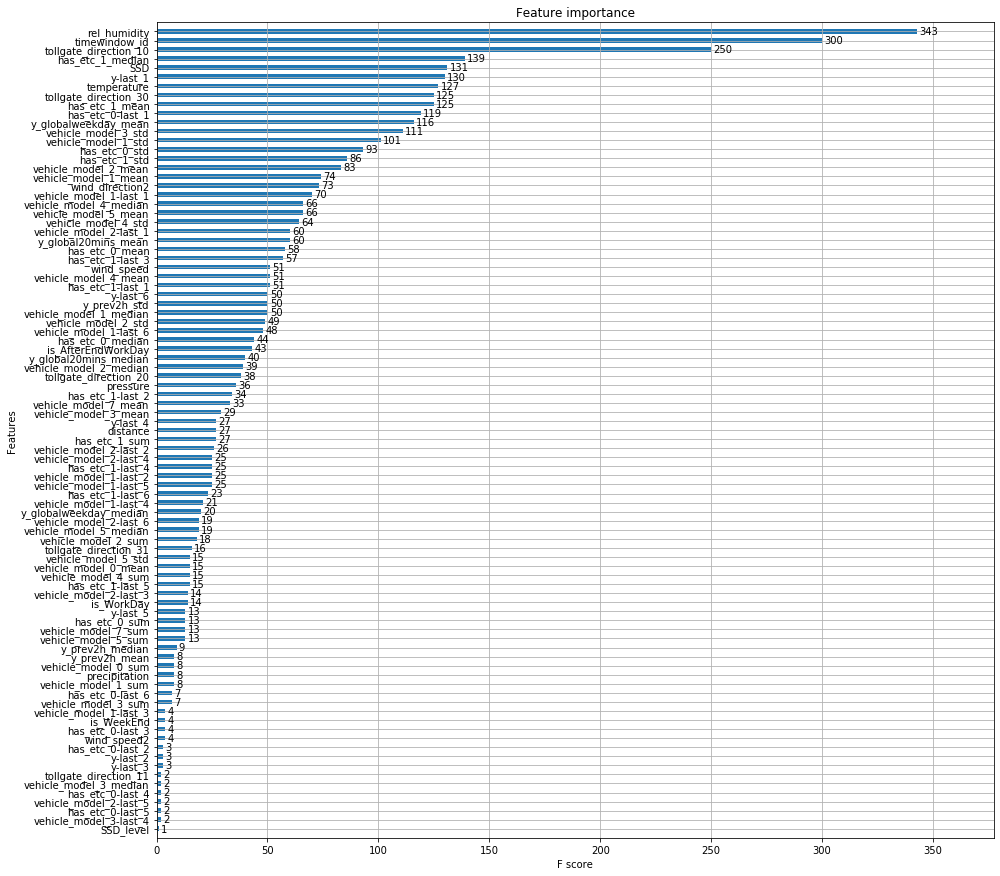

In [12]:
from xgboost import plot_importance
from matplotlib import pyplot

xlf.get_booster().feature_names = list(data.columns)[4:]
xlf.get_booster().get_fscore()

fig,ax = pyplot.subplots(figsize=(15,15))
plot_importance(xlf,height=0.5,ax=ax)
pyplot.show()

In [13]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(weights="uniform")
knn.fit(x_train,y_train)
ans = knn.predict(x_test)
mape(y_test,ans)

0.17647098747456808

In [14]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
ans = dt.predict(x_test)
mape(y_test,ans)

0.16891314295146345

In [15]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
ans = rfr.predict(x_test)
mape(y_test,ans)

/Users/liyuan/anaconda2/envs/py3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.14474297768099464

(-1, 10)

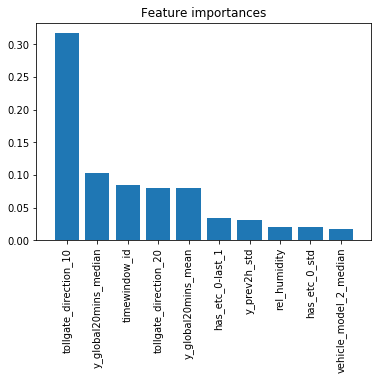

In [62]:
features = list(data.columns)[4:]
importances = rfr.feature_importances_
indices = np.argsort(importances)[::-1][:10]
num_features = 10 #len(importances)
 
#将特征重要度以柱状图展示
plt.figure()
plt.title("Feature importances")
plt.bar(range(num_features), importances[indices])#,orientation="horizontal")
plt.xticks(range(num_features), [features[i] for i in indices], rotation='90')
plt.xlim([-1, num_features])

In [16]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
ans = gbr.predict(x_test)
mape(y_test,ans)

0.1431879249494684

(-1, 10)

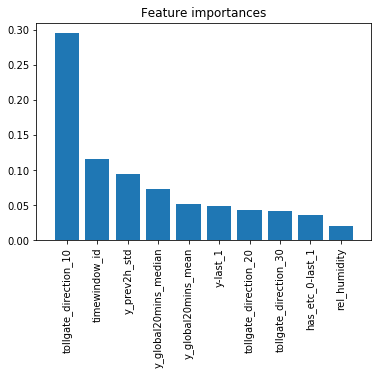

In [61]:
features = list(data.columns)[4:]
importances = gbr.feature_importances_
indices = np.argsort(importances)[::-1][:10]
num_features = 10 #len(importances)
 
#将特征重要度以柱状图展示
plt.figure()
plt.title("Feature importances")
plt.bar(range(num_features), importances[indices])#,orientation="horizontal")
plt.xticks(range(num_features), [features[i] for i in indices], rotation='90')
plt.xlim([-1, num_features])

In [17]:
from sklearn import neural_network
# 不稳定
MLP = neural_network.MLPRegressor()
MLP.fit(x_train,y_train)
ans = MLP.predict(x_test)
mape(y_test,ans)

0.1677814173584069

In [ ]:
def model2submission(model):

    
    submission = pd.read_csv('./submission_sample/submission_sample_travelTime.csv')
    result = pd.merge(submission,pred,on=['intersection_id','tollgate_id','time_window'],how='left')\
            .drop('avg_travel_time',axis=1)
    result.columns=submission.columns
    result.to_csv('./submission_sample/xgb_travelTime.csv', index=False)
    
model2submission(xlf)

In [45]:
import pandas as pd 
from datetime import datetime, timedelta, time
def automlsubmit():
    automl = pd.read_csv('./submission_sample/task2google_automl_0.103.csv')[['tollgate_id','start_time','direction','predicted_y']]
    submission = pd.read_csv('./submission_sample/submission_sample_volume.csv')

    submission['start_time'] = submission['time_window'].map(lambda x: datetime.strptime(x.split(',')[0][1:], '%Y-%m-%d %H:%M:%S')).astype('str')

    result = pd.merge(submission.drop('volume',axis=1),automl,on=['direction','tollgate_id','start_time'],how='left').drop('start_time',axis=1)
    result.columns=submission.columns[:4]
    result.to_csv('./submission_sample/automl_sample_volume.csv', index=False) 

automlsubmit()